<div style="
    background: linear-gradient(to right, #f0f0f0, #e6e6e6); 
    padding: 30px; 
    border-radius: 15px;
    color: #ff6600; /* Vibrant orange */
    font-weight: bold; 
    text-align: center;
    font-size: 28px; 
    font-family: 'Verdana', sans-serif;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);
">
    Spam Email Classifier
</div>

![spam](https://raw.githubusercontent.com/deepankarkotnala/Email-Spam-Ham-Classifier-NLP/master/images/email_spam_ham.png)

<div style="
    padding: 15px; 
    color: #ff6600; /* Darker orange */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Verdana', sans-serif;
    text-align: left; /* Left-aligned */
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
    margin-top: 10px; /* Space between title and subtitle */
">
    Import Some Important Libraries:
</div>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize

import nltk
from collections import Counter


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<div style="
    padding: 15px; 
    color: #ff6600; /* Darker orange */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Verdana', sans-serif;
    text-align: left; /* Left-aligned */
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
    margin-top: 10px; /* Space between title and subtitle */
">
    Remove Warnings:
</div>

In [60]:
import warnings
warnings .filterwarnings("ignore")

In [61]:
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows',None)

<div style="
    padding: 15px; 
    color: #ff6600; /* Darker orange */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Verdana', sans-serif;
    text-align: left; /* Left-aligned */
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
    margin-top: 10px; /* Space between title and subtitle */
">
    Load Data:
</div>


In [62]:
df=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding_errors= 'replace')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


<div style="
    padding: 15px; 
    color: #ff6600; /* Darker orange */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Verdana', sans-serif;
    text-align: left; /* Left-aligned */
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
    margin-top: 10px; /* Space between title and subtitle */
">
    Let's have information about the dataset:
</div>


In [63]:
# i will drop these colomns they aren't useful
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [64]:
# Rename columns for better clarity 
df.columns = ['Label', 'Message']

In [65]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [66]:
df.shape

(5572, 2)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [68]:
df.isna().sum()

Label      0
Message    0
dtype: int64

In [69]:
df.describe(include='object')

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [70]:
df.duplicated().sum()

403

Number of duplicate rows: 403


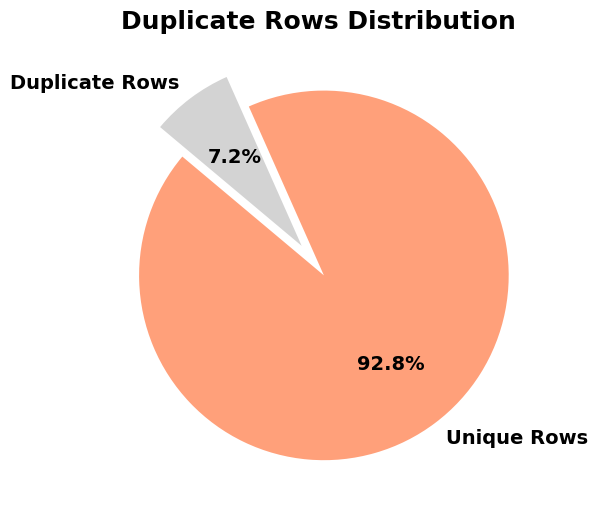

In [71]:
# Count duplicated rows
duplicate_count = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}")

# Prepare data
unique_count = len(df) - duplicate_count
row_types = ['Unique Rows', 'Duplicate Rows']
counts = [unique_count, duplicate_count]

plt.figure(figsize=(8, 6))
plt.pie(
    counts, 
    labels=row_types, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=["#FFA07A", "#D3D3D3"], 
    explode=(0.05, 0.15),  
    textprops={'fontsize': 14, 'color': '#000000', 'fontweight': 'bold'}  
)
plt.title('Duplicate Rows Distribution', fontsize=18, color='#000000', fontweight='bold')  
plt.show()


In [72]:
# Show duplicate rows
duplicates = df[df.duplicated()]
print(duplicates.head())

    Label  \
102   ham   
153   ham   
206   ham   
222   ham   
325   ham   

                                                                                                                                                              Message  
102  As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune  
153  As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune  
206      As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We went there.  
222                                                                                                                                            Sorry, I'll call later  
325                                                                              

In [73]:
# Check the label distribution among duplicates
print(duplicates['Label'].value_counts())

Label
ham     309
spam     94
Name: count, dtype: int64


In [74]:
df=df.drop_duplicates()

In [75]:
df.shape

(5169, 2)

In [76]:
df.duplicated().sum()

0

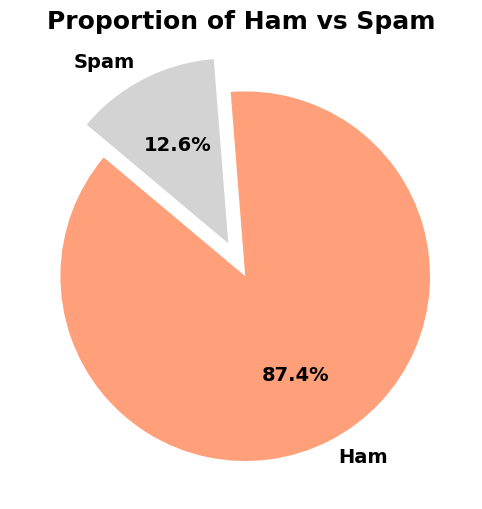

In [77]:
# Count the number of ham and spam messages
label_counts = df['Label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    label_counts, 
    labels=['Ham', 'Spam'],  
    autopct='%1.1f%%', 
    startangle=140, 
    colors=["#FFA07A", "#D3D3D3"],  
    explode=(0.05, 0.15),  
    textprops={'fontsize': 14, 'color': '#000000', 'fontweight': 'bold'}  
)
plt.title('Proportion of Ham vs Spam', fontsize=18, color='#000000', fontweight='bold')  
plt.show()



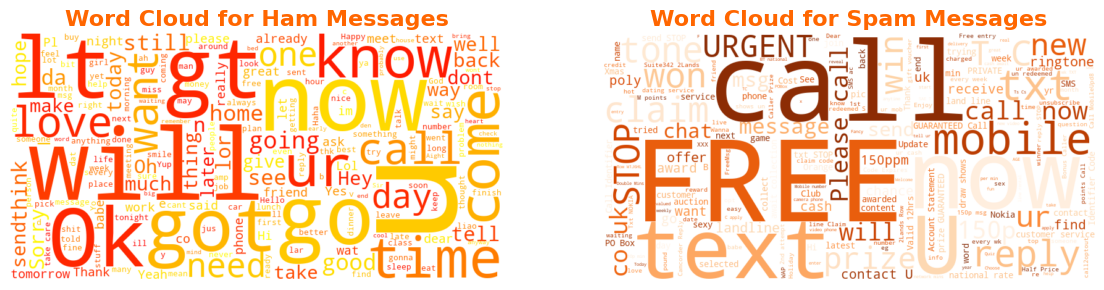

In [78]:
from wordcloud import WordCloud

# Word Cloud for Ham
ham_words = ' '.join(df[df['Label'] == 'ham']['Message'])
ham_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='autumn').generate(ham_words)

# Word Cloud for Spam
spam_words = ' '.join(df[df['Label'] == 'spam']['Message'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Oranges').generate(spam_words)

# Display word clouds
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages', fontsize=16, color='#FF6600', fontweight='bold')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages', fontsize=16, color='#FF6600', fontweight='bold')
plt.axis('off')

plt.show()


In [79]:
# Adding Word Count Feature
df['Word_Count'] = df['Message'].apply(lambda x: len(str(x).split()))

# Adding Character Count Feature
df['Char_Count'] = df['Message'].apply(lambda x: len(str(x)))

# Adding Average Word Length Feature
# Handling division by zero to avoid errors for messages with zero words
df['Avg_Word_Length'] = df.apply(
    lambda row: row['Char_Count'] / row['Word_Count'] if row['Word_Count'] > 0 else 0, axis=1
)


In [80]:
df.head()

,Label,Message,Word_Count,Char_Count,Avg_Word_Length
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",20,111,5.550000
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,28,155,5.535714
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545
4,ham,"Nah I don't think he goes to usf, he lives around here though",13,61,4.692308


In [81]:
df.describe()

,Word_Count,Char_Count,Avg_Word_Length
count,5169.000000,5169.000000,5169.000000
mean,15.340685,78.923776,5.165399
std,11.068488,58.174846,1.128830
min,1.000000,2.000000,2.000000
25%,7.000000,36.000000,4.571429
50%,12.000000,60.000000,5.000000
75%,22.000000,117.000000,5.571429
max,171.000000,910.000000,49.000000


<div style="
    padding: 15px; 
    color: #ff6600; /* Darker orange */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Verdana', sans-serif;
    text-align: left; /* Left-aligned */
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
    margin-top: 10px; /* Space between title and subtitle */
">
    Preprocess Data:
</div>

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Word_Count', 'Char_Count', 'Avg_Word_Length']] = scaler.fit_transform(df[['Word_Count', 'Char_Count', 'Avg_Word_Length']])


In [83]:
def normalize_text(text):
    """
    Enhanced text normalization: lowercasing, punctuation removal, stopword removal,
    abbreviation handling, and rare word removal.
    """
    # Initialize stopwords
    stop_words = set(stopwords.words('english'))
    
    # Custom abbreviations dictionary
    abbreviations = {
        "la": "",
        "wat": "what",
        "n": "and",
        "ur": "your",
        "u": "you"
    }
    
    # Convert text to lowercase
    text = text.lower()
    
    # Expand abbreviations
    words = text.split()
    words = [abbreviations.get(word, word) for word in words]
    text = " ".join(words)
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove punctuation, non-alphabetic characters, and stopwords
    words = [re.sub(r"[^\w\s]", "", word) for word in words if word.isalpha() and word not in stop_words]
    
    # Rare words removal (can be applied after initial processing)
    word_counts = Counter(" ".join(df['Message']).split())
    rare_words = {word for word, count in word_counts.items() if count < 2}
    words = [word for word in words if word not in rare_words]
    
    # Join words back into a single string
    normalized_text = " ".join(words)
    
    return normalized_text


In [84]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional, to ensure full support for lemmatization


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [85]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Initialize Stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Custom abbreviation mapping
abbreviations = {
    "u": "you",
    "ur": "your",
    "la": "the",  # Optional: Add abbreviation mappings here
    "wat": "what",
    "n": "and",
    "e": "the"
}

# Function to handle text normalization with stemming, stopwords, and abbreviation handling
def normalize_text(text):
    """
    Simplified text normalization: lowercasing, punctuation removal, stopword removal, 
    abbreviation handling, and stemming.
    """
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into words
    words = word_tokenize(text)

    # Expand abbreviations
    words = [abbreviations.get(word, word) for word in words]

    # Remove punctuation, stopwords, and non-alphabetic words
    words = [re.sub(r"[^\w\s]", "", word) for word in words if word.isalpha() and word not in stop_words]

    # Stem words
    words = [stemmer.stem(word) for word in words]

    # Join words back into a single string
    normalized_text = " ".join(words)
    return normalized_text

In [86]:
# Apply the normalize_text function to the 'Message' column
df['Normalized_Message'] = df['Message'].apply(normalize_text)


In [87]:
df.head()

,Label,Message,Word_Count,Char_Count,Avg_Word_Length,Normalized_Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",0.111765,0.120044,0.075532,go jurong point avail bugi great world buffet cine got amor
1,ham,Ok lar... Joking wif u oni...,0.029412,0.029736,0.060284,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,0.158824,0.168502,0.075228,free entri wkli comp win fa cup final tkt may text fa receiv entri question std txt rate c appli
3,ham,U dun say so early hor... U c already then say...,0.058824,0.051762,0.052224,dun say earli hor c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives around here though",0.070588,0.064978,0.057283,nah think goe usf live around though


In [88]:
# Set Pandas options to display the full content of columns without truncation
pd.set_option('display.max_colwidth', None)

# Display the first row's full original and normalized message
row = df.iloc[0]
print(f"Message: {row['Message']}")
print(f"Normalized_Message: {row['Normalized_Message']}")



Message: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Normalized_Message: go jurong point avail bugi great world buffet cine got amor


In [89]:
from collections import Counter

spam_words = Counter(" ".join(df[df['Label'] == 'spam']['Normalized_Message']).split())
ham_words = Counter(" ".join(df[df['Label'] == 'ham']['Normalized_Message']).split())

# Print spam words
print("Most Common Words in Spam Messages:")
print("-" * 35)
print(f"{'Word':<10} | {'Count':<10}")
print("-" * 35)
for word, count in spam_words.most_common(10):
    print(f"{word:<10} | {count:<10}")
print("\n")

# Print ham words
print("Most Common Words in Ham Messages:")
print("-" * 35)
print(f"{'Word':<10} | {'Count':<10}")
print("-" * 35)
for word, count in ham_words.most_common(10):
    print(f"{word:<10} | {count:<10}")



Most Common Words in Spam Messages:
-----------------------------------
Word       | Count     
-----------------------------------
call       | 320       
free       | 189       
txt        | 141       
text       | 122       
mobil      | 114       
stop       | 104       
repli      | 103       
claim      | 98        
prize      | 82        
get        | 74        


Most Common Words in Ham Messages:
-----------------------------------
Word       | Count     
-----------------------------------
go         | 401       
get        | 349       
gt         | 288       
lt         | 287       
come       | 272       
got        | 236       
like       | 234       
know       | 234       
call       | 232       
time       | 217       


In [90]:
# Encode labels
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})


In [92]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# Split features and labels
X = df['Message']
y = df['Label']

# Convert text data into numerical form using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_transformed = vectorizer.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_transformed, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())


Before SMOTE: Label
0    4516
1     653
Name: count, dtype: int64
After SMOTE: Label
0    4516
1    4516
Name: count, dtype: int64


<div style="
    padding: 15px; 
    color: #ff6600; /* Darker orange */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Verdana', sans-serif;
    text-align: left; /* Left-aligned */
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
    margin-top: 10px; /* Space between title and subtitle */
">
    Modeling:
</div>

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Training set class distribution:")
print(pd.Series(y_train).value_counts())


Training set class distribution:
Label
0    3632
1    3593
Name: count, dtype: int64


In [94]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [95]:
# Predictions
y_pred = model.predict(X_test)

In [96]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9889319313779745


In [97]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       884
           1       0.99      0.99      0.99       923

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



<div style="
    padding: 15px; 
    color: #ff6600; /* Darker orange */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Verdana', sans-serif;
    text-align: left; /* Left-aligned */
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
    margin-top: 10px; /* Space between title and subtitle */
">
    Save Model:
</div>

In [98]:
import joblib
churn_model=model
# Save the model
joblib.dump(churn_model, "model.pkl")

['model.pkl']

In [99]:
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("TF-IDF vectorizer loaded successfully.")

TF-IDF vectorizer loaded successfully.


<div style="
    padding: 15px; 
    color: #ff6600; /* Darker orange */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Verdana', sans-serif;
    text-align: left; /* Left-aligned */
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
    margin-top: 10px; /* Space between title and subtitle */
">
    Predict New Data:
</div>

In [112]:
def predict_message(message, model, vectorizer):
    # Define label mapping
    label_mapping = {
        0: "Not Spam", 
        1: "Spam"       
    }
    
    # Preprocess the message
    message_transformed = vectorizer.transform([message])
    
    # Predict the class and probabilities
    predicted_class = model.predict(message_transformed)[0]
    predicted_probabilities = model.predict_proba(message_transformed)[0]
    
    # Map the predicted class to its label
    predicted_label = label_mapping[predicted_class]
    
    return predicted_label, predicted_probabilities



In [113]:
new_message = "Hi Alex, I hope you're doing well. Just a reminder about our meeting tomorrow at 10 AM. Let me know if the time still works for you. Looking forward to catching up!"
predicted_class, predicted_probabilities = predict_message(new_message, model, vectorizer)
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probabilities: {predicted_probabilities}")


Predicted Class: Not Spam
Prediction Probabilities: [0.98789307 0.01210693]


In [114]:
new_message = "Congratulations! You've won a free trip to Hawaii!"
predicted_class, predicted_probabilities = predict_message(new_message, model, vectorizer)
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probabilities: {predicted_probabilities}")


Predicted Class: Spam
Prediction Probabilities: [0.06310069 0.93689931]
